In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

In [4]:
def read_image(filename, byteorder='>'):
    
    #first we read the image, as a raw file to the buffer
    with open(filename, 'rb') as f:
        buffer = f.read()
    
    #using regex, we extract the header, width, height and maxval of the image
    header, width, height, maxval = re.search(
        b"(^P5\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    
    #then we convert the image to numpy array using np.frombuffer which interprets buffer as one dimensional array
    img = np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))
    mean, std = img.mean(), img.std()
    img = (img  - mean) / std
    return img

## Raw images. Accuracy 88%,  model.ipynb

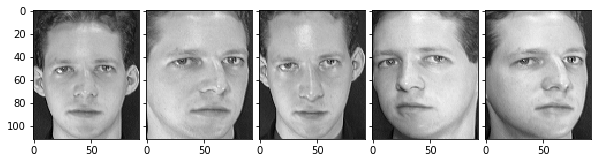

In [5]:
r_imgs = []
for i in range(5):
    r_imgs.append(np.asarray(Image.open('att-database-of-faces/s1/' + str(i + 1) + '.pgm')))
fig = plt.figure(figsize=(10,20))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 5),  
                 axes_pad=0.1, 
                 )
for ax, im in zip(grid, r_imgs):#, r_im3, r_im]):
    ax.imshow(im, cmap='gray')
plt.show()

## Standardize images. Accuracy 96%, model-std.ipynb

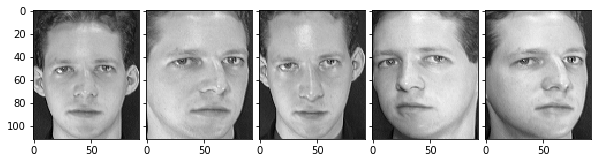

In [6]:
r_imgs = []
for i in range(5):
    r_imgs.append(read_image('att-database-of-faces/s1/' + str(i+1) + '.pgm', 'rw+'))
fig = plt.figure(figsize=(10,20))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(1, 5),  
                 axes_pad=0.1, 
                 )
for ax, im in zip(grid, r_imgs):#, r_im3, r_im]):
    ax.imshow(im, cmap='gray')
plt.show()